# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [62]:
print(pd.__version__)
pd.cut(np.array([1, 7, 5, 4, 6, 3]),3, labels=["bad", "medium", "good"])

0.24.1


[bad, good, medium, medium, good, bad]
Categories (3, object): [bad < medium < good]

In [102]:
# TODO
# Import clean describe and remap data values for better representation.
# DS_Unit_1_Sprint_Challange_1
# The code below completes Part one of the test.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

haberman = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header =None , names= ['age', 'year of operation', 'number of positives', 'survival status'])
print('According to the UCI Website, there are 306 ovservations or rows, and 4 features, or columns. \n')
print('The Shape of the DataFrame is, ',haberman.shape)
print('In the Shape, I see there are 306 rows, and 4 Columns \n \n')
print('Validating that we have no missing values')
print(haberman.isna().sum(), '\n \n')
print(haberman.describe())
print('The description of the data also shows us that there are 306 instances or rows, and 4 columns. \n I added the Header information in the read_csv function, because it was the most consistent way to do it, also the shortest. \n \n')
print('Below I am printing out the first 5 observations.')
print(haberman.head(5))

haberman['survival status'] = haberman['survival status'].map({1:0, 2:1})
print('The First 5 instances after we have changed survival status to 0 for not survived 5 years, and 1 for survived more than 5 years.')
print(haberman.head(5))

print(haberman.dtypes)

print(haberman.groupby('survival status').count())

According to the UCI Website, there are 306 ovservations or rows, and 4 features, or columns. 

The Shape of the DataFrame is,  (306, 4)
In the Shape, I see there are 306 rows, and 4 Columns 
 

Validating that we have no missing values
age                    0
year of operation      0
number of positives    0
survival status        0
dtype: int64 
 

              age  year of operation  number of positives  survival status
count  306.000000         306.000000           306.000000       306.000000
mean    52.457516          62.852941             4.026144         1.264706
std     10.803452           3.249405             7.189654         0.441899
min     30.000000          58.000000             0.000000         1.000000
25%     44.000000          60.000000             0.000000         1.000000
50%     52.000000          63.000000             1.000000         1.000000
75%     60.750000          65.750000             4.000000         2.000000
max     83.000000          69.000000          

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [75]:
print(haberman)

     age  year of operation  number of positives  survival status
0     30                 64                    1                0
1     30                 62                    3                0
2     30                 65                    0                0
3     31                 59                    2                0
4     31                 65                    4                0
5     33                 58                   10                0
6     33                 60                    0                0
7     34                 59                    0                1
8     34                 66                    9                1
9     34                 58                   30                0
10    34                 60                    1                0
11    34                 61                   10                0
12    34                 67                    7                0
13    34                 60                    0                0
14    35  

In [107]:
# TODO
# This code block will complete Part 2 of the Challange.

#haberman['discrete'] = pd.cut(haberman['age'], 5, labels = ['Young', 'Low Mid', 'Mid', 'High Mid', 'Old'])
#pd.crosstab(haberman_binned['age'], haberman['survival status']) #columns=['age', 'survival status'])
#pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels=["bad", "medium", "good"])
age_bins = pd.cut(haberman['age'], bins=5, labels= ['Young', 'Low Mid', 'Mid', 'High Mid', 'Old'])
#ndf = pd.cut(haberman['age'], bins=5, labels = False)
#print(ndf)

print('This pivot table shows us the ages binned into five groups, with the index as survival status')
print('In this pivot graph, we can see in the number of positives section, that higher survival rates')
print('correlate with a higher number of positives found.')
print(haberman.pivot_table(index = 'survival status', columns= age_bins))

print('The dataframe describe function is always useful, it gives us useful data about every feature in the DataFrame \n')
print(haberman.describe())



This pivot table shows us the ages binned into five groups, with the index as survival status
In this pivot graph, we can see in the number of positives section, that higher survival rates
correlate with a higher number of positives found.
                       age                                              \
age                  Young    Low Mid        Mid   High Mid        Old   
survival status                                                          
0                36.128205  46.029412  56.115942  66.162791  74.666667   
1                36.250000  45.645161  55.444444  66.000000  78.333333   

                number of positives                                          \
age                           Young   Low Mid       Mid  High Mid       Old   
survival status                                                               
0                          3.435897  2.558824  3.188406  2.232558  0.666667   
1                          7.500000  7.741935  8.222222  6.625000  2.0000

For my first plot, I will use seaborn, and give a kdeplot of the age, vs survival status. This will show us where the concentration of survival is in the age range


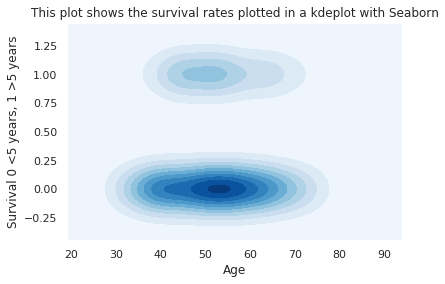

This shows a low rate of survival with a very small concentration of survival around the age of 50.
For my first plot, I will use seaborn, and give a kdeplot of the age, vs survival status. This will show us where the concentration of survival is in the age range


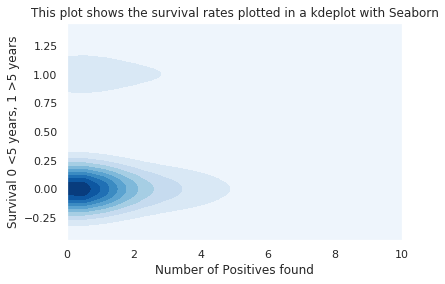

This shows A near fatal link between the number of positives, and the rate of mortality.


In [113]:
print('For my first plot, I will use seaborn, and give a kdeplot of the age, vs survival status. This will show us where the concentration of survival is in the age range')

age_vs_survival = sns.kdeplot(haberman['age'],haberman['survival status'], cmap = 'Blues', shade=True)
age_vs_survival.set(xlabel='Age', ylabel = 'Survival 0 <5 years, 1 >5 years', title = 'This plot shows the survival rates plotted in a kdeplot with Seaborn')
plt.show()
print('This shows a low rate of survival with a very small concentration of survival around the age of 50.')

print('For my first plot, I will use seaborn, and give a kdeplot of the age, vs survival status. This will show us where the concentration of survival is in the age range')

pos_vs_survival = sns.kdeplot(haberman['number of positives'],haberman['survival status'], cmap = 'Blues', shade=True)
pos_vs_survival.set(xlabel='Number of Positives found', ylabel = 'Survival 0 <5 years, 1 >5 years', title = 'This plot shows the survival rates plotted in a kdeplot with Seaborn', xlim=(0,10))
plt.show()
print('This shows A near fatal link between the number of positives, and the rate of mortality.')



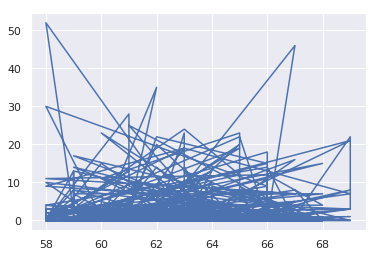

In [142]:
#year_vs_survival = sns.kdeplot(haberman['year of operation'],haberman['survival status'], cmap = 'Blues', shade=True)

#sns.kdeplot(haberman['age'], haberman['year of operation'])
#hman = haberman.groupby('survival status')
#plt.plot(hman.data['age'], hman.data['years of operation'])

#sns.boxplot(haberman['age'], haberman['number of positives'], haberman['survival status'])

#sns.jointplot(haberman['year of operation'], haberman['number of positives'])

#hman.mean()

#sns.jointplot(haberman['year of operation'], haberman['survival status'])
#sns.jointplot(haberman['year of operation'], haberman['number of positives'])

plt.plot(haberman['year of operation'], haberman['number of positives'])

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

The first Question a feature that looks to have a positive relationship with survival, Ploting the joint plot of the year ofoperation, and the survival status, the highest survival rate was between 58, and 61.

The second Question a feature that looks to have a negative relationship with survival, is the number os positives found.

The two features are related by a larger number of positives were found in these years.

Also this data looks to be skewed because of outliers.